<a href="https://colab.research.google.com/github/LanqingDu/UnstructuredDataAnalytics/blob/main/10_WebScraping.ipynb" target="_blank">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# **Web Scraping**



> **Instructor:** Dr. Lanqing Du  
> **Acknowledgement:** This notebook referenced to R user guide content and Machine Learning resoures.  
> **Objective:** Advanced Topics: Factor Analysis.  
> **Instructions:** You can preview the **Table of Contents** from the side bar.

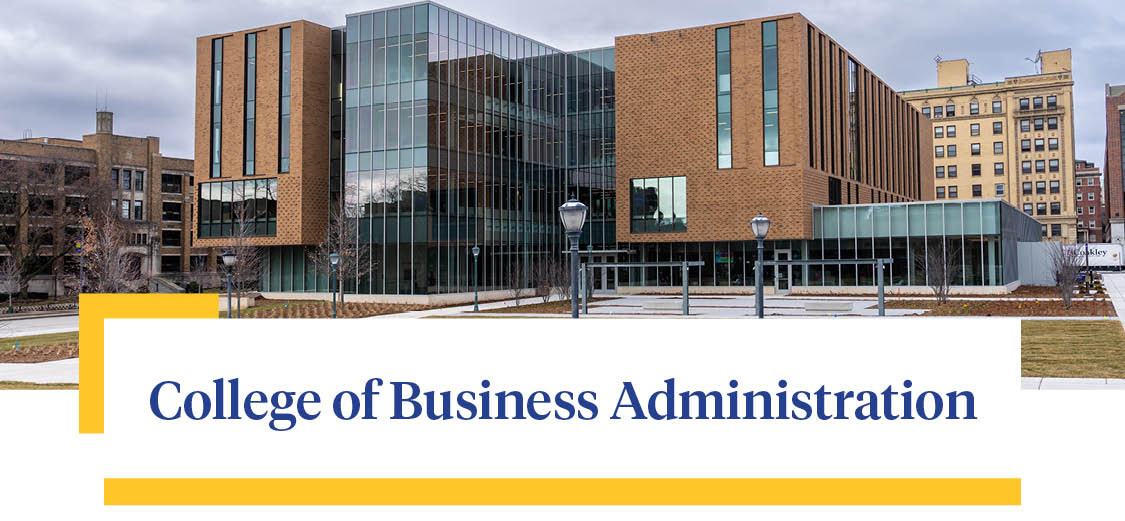
---

## [1. Objective](#obj)

This tutorial is for web scraping. **Web Scraping and Ethics:** Before we go any further, we must mention that the practice of web scraping can be controversial

  * Some websites welcome the practice, others turn a blind eye, and yet others even put in active countermeasures to try to prohibit someone from scraping the data for use off of the hosting website

  * We suggest that if you are scraping data from a website, you should at least try to find out if scraping is actively discouraged on the site and, if so, avoid scraping on that property

  * A relatively simple way to check the rules on scraping a particular website is to examine its affinity toward web scrapers and automated crawling of the site

  * It will list its preferences in a file in its root folder called robots.txt

  * These are instructions from the website to automated programs, like web crawlers for search engines, that tell these programs what directories and files it gives its permission to be downloaded and indexed and which ones it does not want to be indexed through the use of the disallow nomenclature

  * Here are the contents of the robots.txt file from NFL.com in June 2023 (see https://www.nfl.com/robots.txt):


    *  User-agent: *

    *  Disallow: /_ctv/

    *  Disallow: /_fantasy-app/

    *  Disallow: /_libraries/

    *  Disallow: /_mobile-app/

    *  Disallow: /_mobileview/

    *  Disallow: /_phs/

    *  Disallow: /_sponsors/

    *  Disallow: /account/

    *  Disallow: /nfl-films-beta/

    *  Disallow: /search/

    *  Sitemap: https://www.nfl.com/sitemap-index.xml

    *  User-agent: Mediapartners-Google

    *  Disallow: /stats/player-stats/*





## [2. Web Document Structure](#WD)


Before we can understand how to get the data out of a web page, we need to understand the structure of a web page:

 * Web pages are HTML documents, which are somewhat akin to Markdown documents in that they are written as plain text with instructions for displaying the text within the documents

 * A chunk of text is called a node, and each node is encapsulated within a pair of tags, which are represented between < and > characters. So that is to say that `<sample>` and `</sample>` are the tags that mark the beginning and ending of a node

 * There are many different tags, such as `<p>` for a paragraph, `<b>` for bold, `<i>` for italic, and `<u>` for underline

 * However, we need to concern ourselves especially with the tags that are used to display data tables, as the data we seek will most often be stored in a table

 * The below Table presents a list of common table-related tags and descriptions

 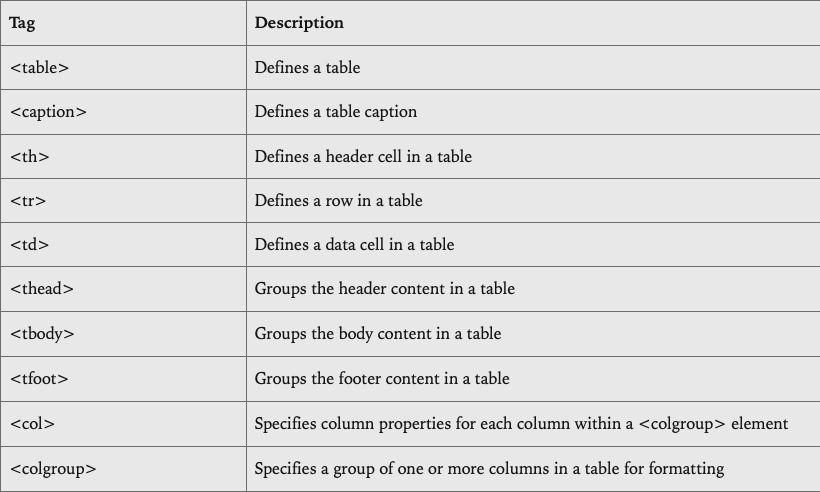



 * Tables have rows, and the rows have cells

 * The cells can be either header cells or data cells

 * A sample table from https://w3schools.com that we might scrape could look like the following:
        
          <table style="width:100%">
          <tr>
          <th>Firstname</th>
          <th>Lastname</th>
          <th>Age</th>
          </tr>
          <tr>
          <td>Jill</td>
          <td>Smith</td>
          <td>50</td>
          </tr>
          <tr>
          <td>Eve</td>
          <td>Jackson</td>
          <td>94</td>
          </tr>
          </table>
        
 * Note that this table has the attribute “style,” and it is set to “width:100%.” This means that the table will by default expand or contract to exactly fill the screen of the viewer

 * Many other attributes are available for <table> and other tags as well

## [3. Web Scraping in R](#ws)

 * We will use the `rvest()` package (like harvest) to implement web scraping techniques

 * As an example of web scraping, we will look at how we might obtain NHL data from the web and convert them into a format where we can analyze them

* To do this, we will look at the website hockeyreference.com and attempt to get all of the data Hockey Reference collects for the 2022-23 Colorado Avalanche players and put them into data frames we can analyze in R

* To achieve this goal, we would like to complete the following two specific tasks:
   1. Download the roster table into a format we can use for R.
   2. Obtain the information from the individual player links.
        
* As of this writing, this information can be found on the web at http://www.hockey-reference.com/teams/COL/2023.html.

* Of course, this could change at a moment's notice, as we have no control over that website directly, which is a problem that analysts face in obtaining data repeatedly.

In [ ]:
# ========================================================
# Step 1: Download and include the data library
# ========================================================

install.packages("dplyr")
install.packages("ggplot2")
install.packages("xml2") # allows us to interact with webpages by parsing XML
install.packages("rvest") # helps us to harvest (scrape) data from web pages
install.packages("janitor") # a set of tools to examine and clean dirty data

library(dplyr)
library(ggplot2)
library(xml2)
library(rvest)
library(janitor)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘snakecase’



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




In [ ]:
# ========================================================
# Step 2: Download and include the data library
# ========================================================

team <- "COL" # Define a team
year <- 2023 # Define a Year
url <- paste("http://www.hockey-reference.com/teams/",
            team,
            "/",
            year,
            ".html",
            sep = "") # Construct a custom URL

pg <- read_html(url) # Read the html content

tables <- pg |> # extract the html tables
  html_table()


 * At this point, you may want to visit the website for this particular page and see what we are trying to put into a data frame for R analysis:

    * Open a web browser and go to https://www.hockey-reference.com/teams/COL/2023.html. We can see by scrolling that this is a very long page with a few hyperlinks near the bottom of our initial view to help us jump to the information we want

    * If we click on the link for “Roster,” it will take us farther down the page to the roster table. There are also hyperlinks for each player in the table. If we want to see information about Nathan MacKinnon, we can click on his name. But for now, it is this table that we want to scrape

  * It may help you also to look at the page source. You may recall that HTML is simply a markup language, a cousin to R Markdown.

      * HTML provides a web browser with instructions on how to display the text contained within the document. To view the raw document code that the page creator used, you can **right-click** on the page and choose **“View Page Source”** (in Google Chrome; other web browsers will allow you to see this as well but will have their own method for displaying the page source).

      * A new tab will open displaying the HTML code

      * The page for the Colorado Avalanche 2022-23 season is over 5,000 lines long!

      * We need to find where the roster table is in this document.

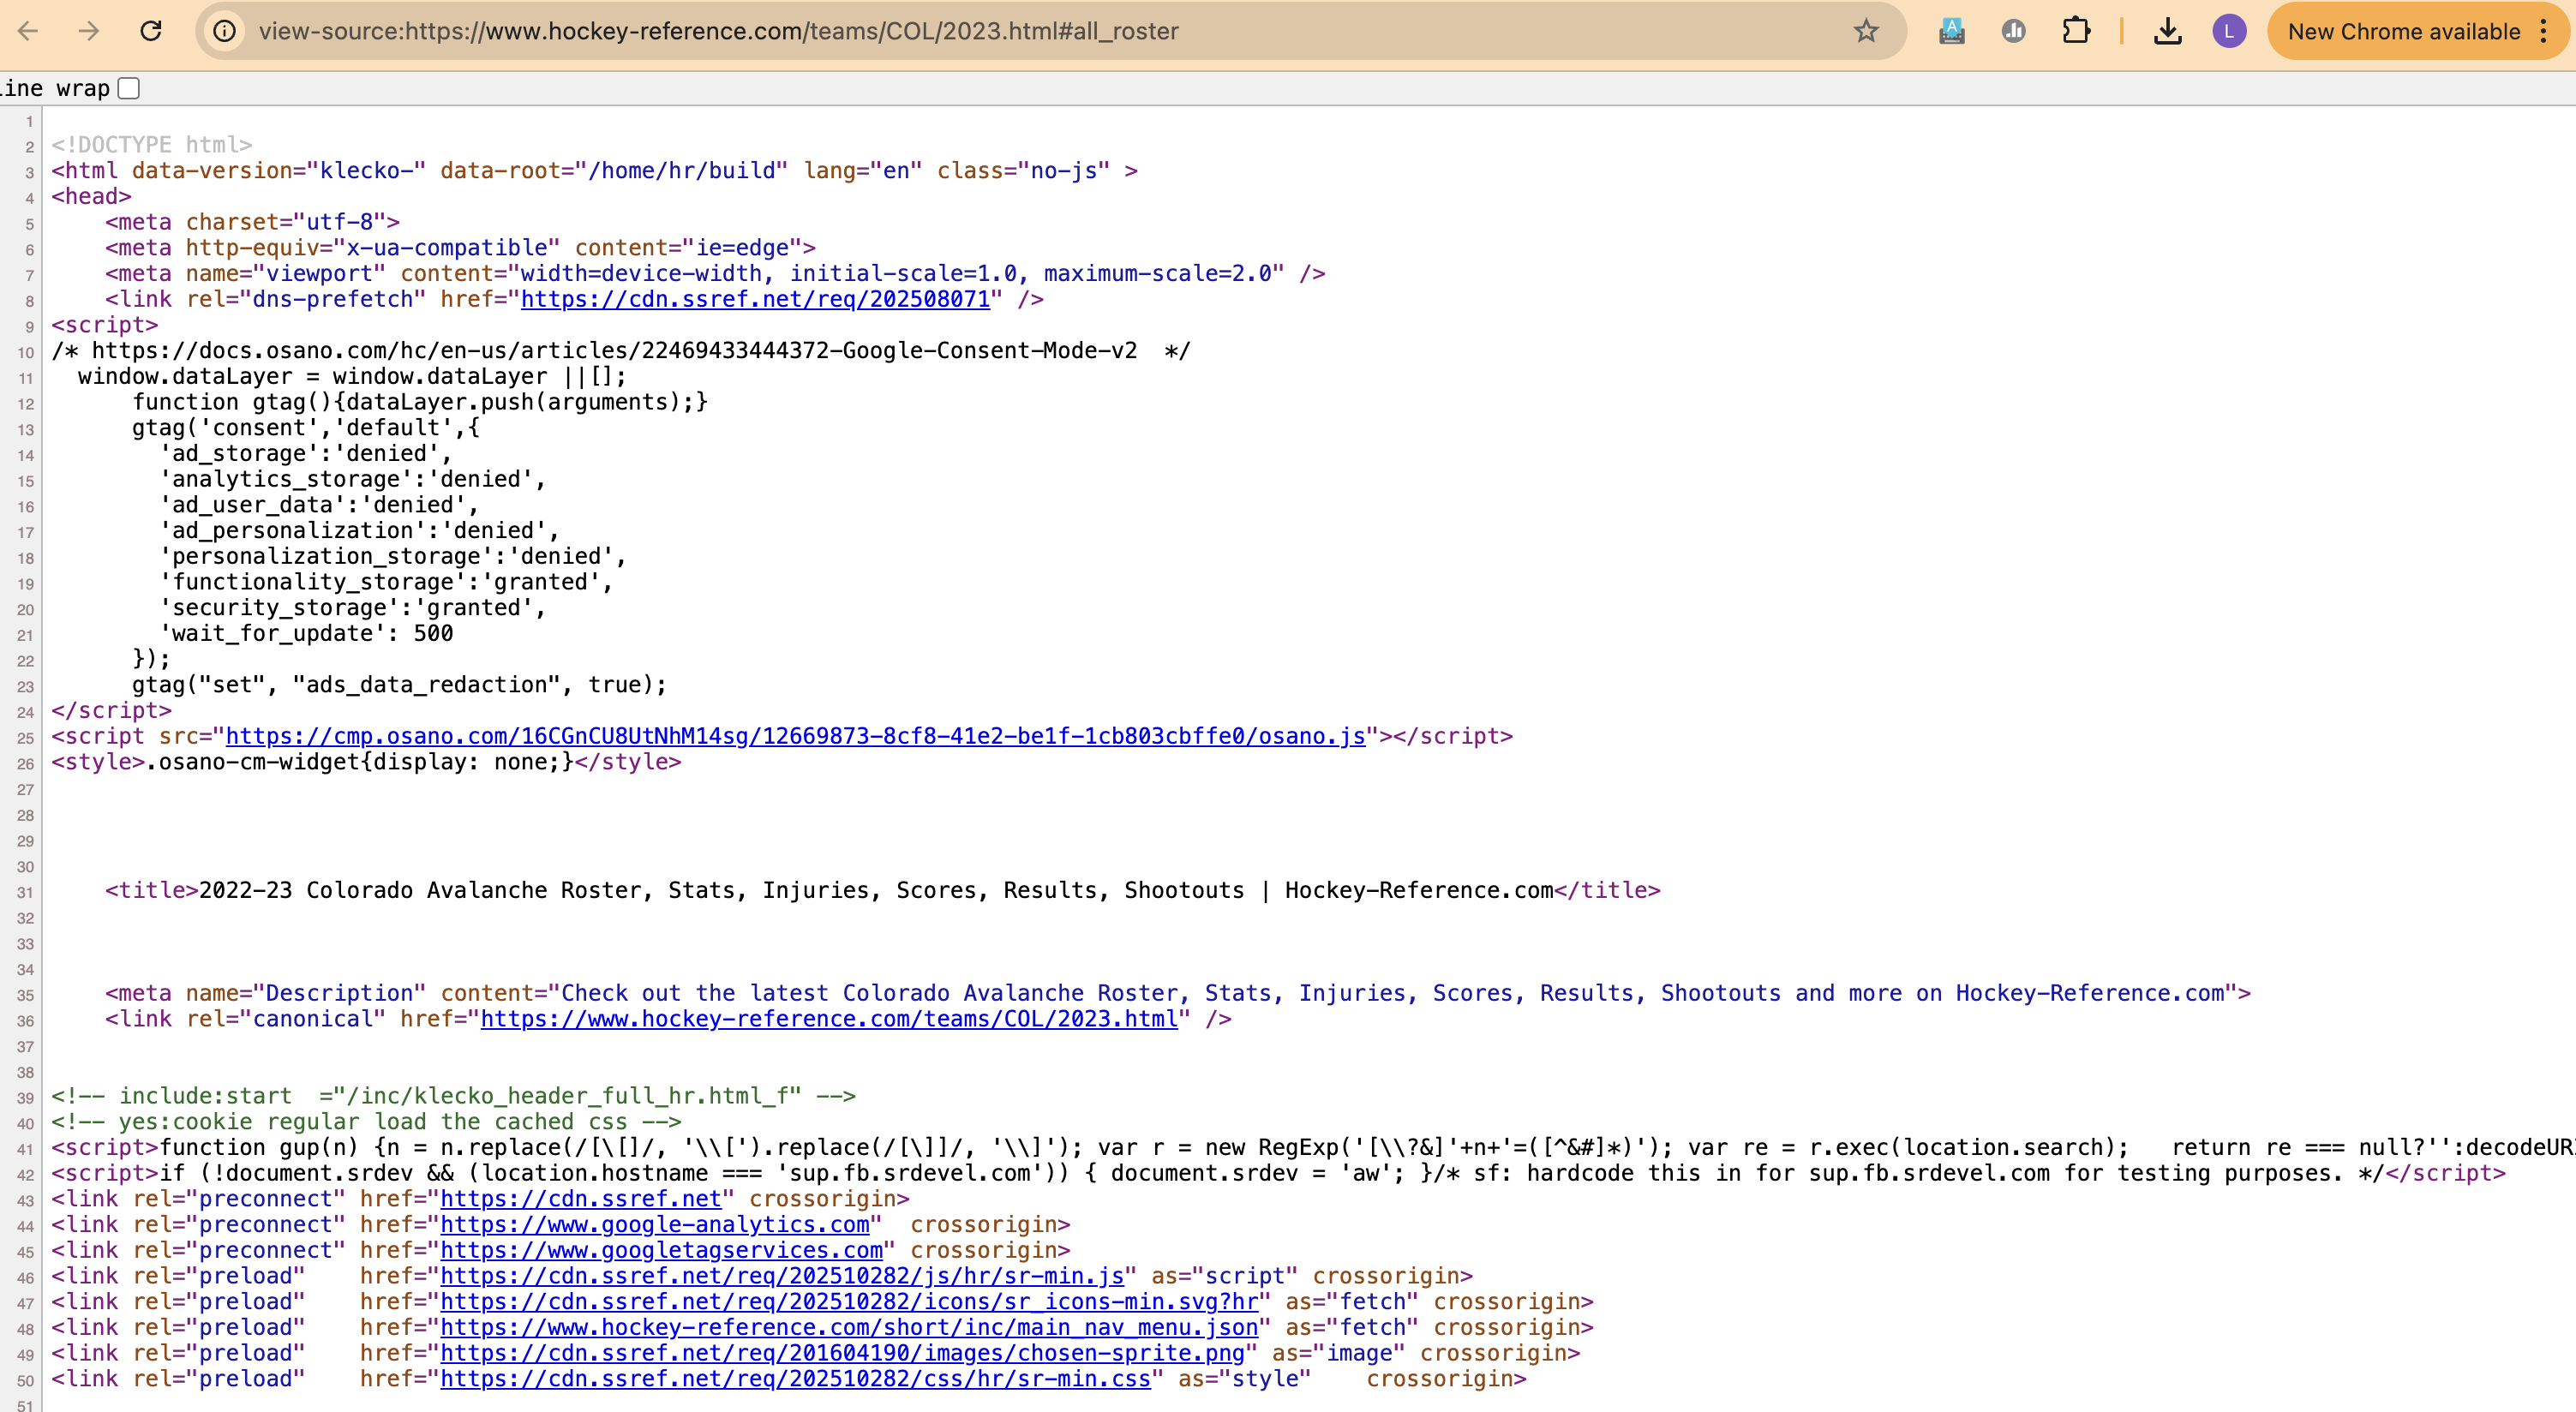

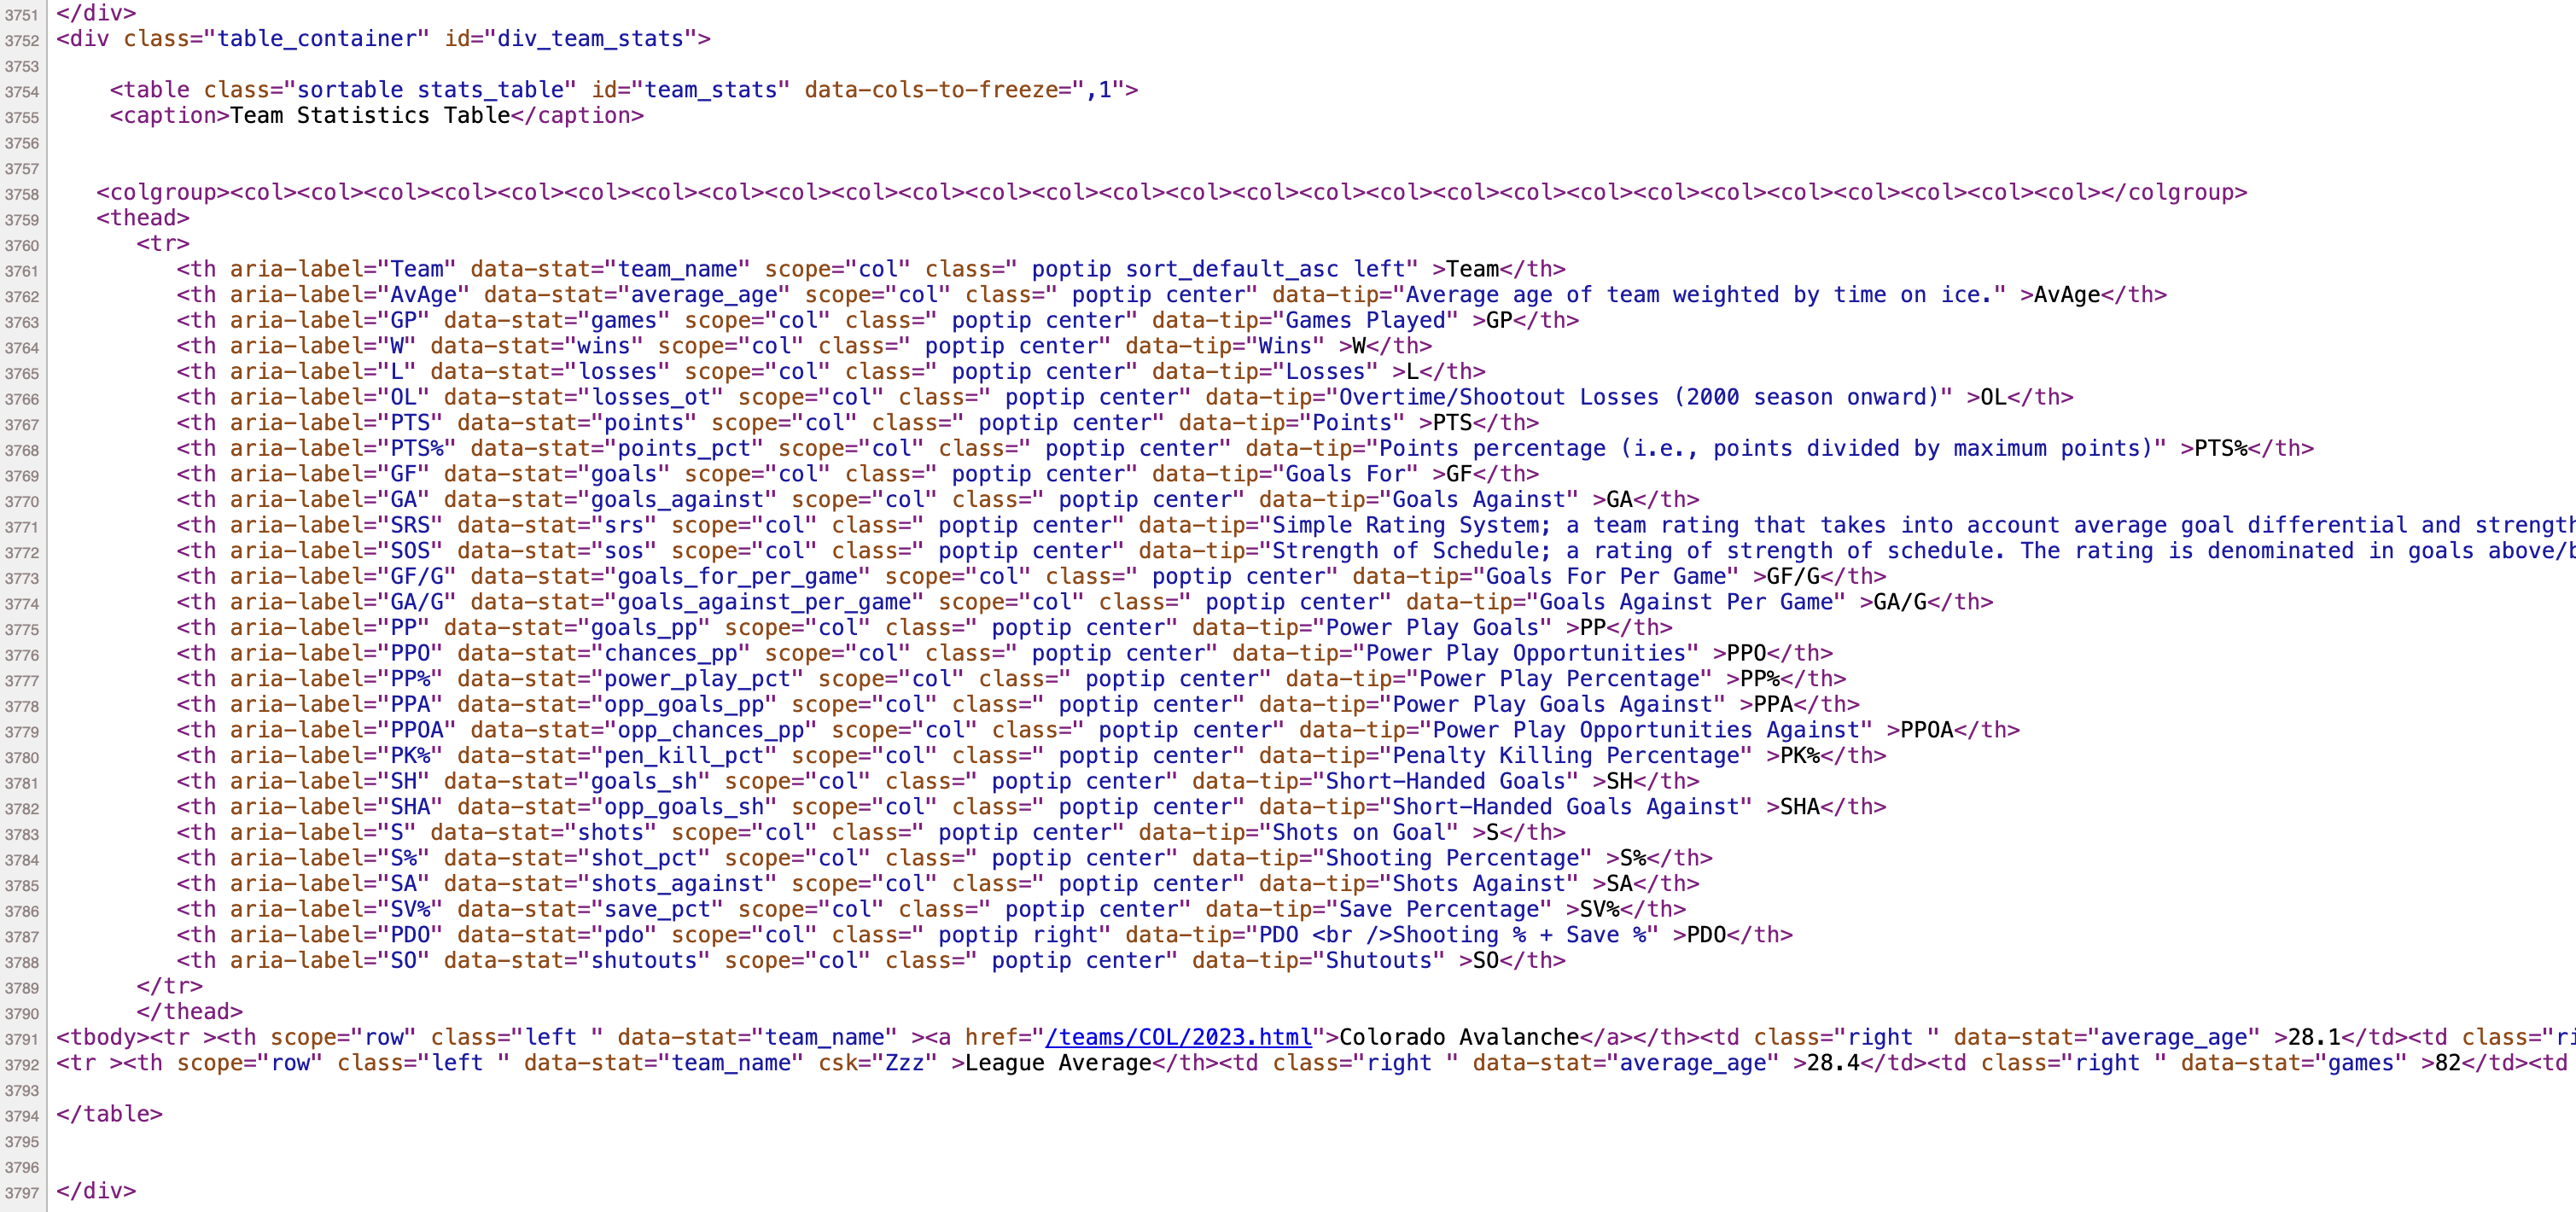

Since tables are contained in HTML nodes (or tags) that contain ``<table>``, we need to search for table in the document

 * Just searching for the word table will return over 100 results, but if you instead search for `<table` (without the > sign, since there are many variables within the table tag, but it will always start with `<table)`, it will return only the tables

 * Go through the results until you find the one related to rosters. You will see that it has id=roster in the tag as an attribute of the table, meaning that the document refers to that table by the ID roster

Now we are ready to get the information for our players

 * In the following code block, we read the website's HTML as described and then identify the tag in the roster table using the `html_nodes()` function to identify the table with the desired tag, using xpath and indicated in this case by "roster"

 * The third line extracts the href (hypertext reference) attributes in the table, which in this case will be the unique links to each player's information on hockey-reference.com:

In [ ]:
# ========================================================
# Step 3: Extract the href (hypertext reference) attributes
# ========================================================

# html_nodes(x, css, xpath)
#   Function        : Extracts nodes (HTML elements) from a webpage or HTML document.
#                     It is part of the **rvest** package, which is used for web scraping.
#                     The function allows you to select elements by **CSS selectors** or **XPath** queries.
#
#   x               : An HTML document or node set, typically obtained using `read_html()`.
#
#   css             : (Optional) A CSS selector string to match specific HTML elements
#                     (e.g., "div.class", "table#id"). Cannot be used together with `xpath`.
#
#   xpath           : (Optional) An XPath expression that precisely identifies elements
#                     based on their hierarchical position and attributes in the HTML structure.
#
#   Returns         : An object of class "xml_nodeset" — a collection of matched HTML elements.
#                     You can further extract attributes (`html_attr()`), text (`html_text()`),
#                     or follow links (`html_attr('href')`) from these nodes.
#--------------------------------------------------------------------------------
#   html_nodes(xpath = '//*[(@id = "roster")]//a') :
#                     Selects all `<a>` (anchor/link) elements found **inside** the HTML node
#                     with the attribute `id = "roster"`.
#
#   xpath expression breakdown:
#       //*[(@id = "roster")]   → Selects the element whose `id` attribute equals "roster"
#       //a                     → Within that element, selects all descendant `<a>` tags
#
#   Returns           : An "xml_nodeset" object containing all hyperlink (`<a>`) elements
#                       inside the HTML section identified by `id = "roster"`.
#                       You can then extract their URLs or link text using:
#                           - `html_attr(nodes, "href")` → to get the link URLs
#                           - `html_text(nodes)`         → to get the visible link text

# html_attr(x, name, default = NA_character_)
#   Function        : Extracts the value of a specific **HTML attribute** from nodes
#                     (HTML elements) returned by `html_nodes()` or similar functions
#                     in the **rvest** package.
#                     Attributes are values inside HTML tags such as `href`, `src`, `id`, `class`, etc.
#
#   x               : An "xml_nodeset" object — usually the output of `html_nodes()`
#                     or `html_elements()`. It represents one or more HTML elements.
#
#   name            : A character string specifying the attribute to extract
#                     (e.g., `"href"`, `"src"`, `"title"`, `"alt"`).
#
#   default         : The value to return if the specified attribute does not exist.
#                     Defaults to `NA_character_`.
#
#   Returns         : A character vector containing the values of the specified attribute
#                     for each matched node. Returns `NA` where the attribute is missing.
#--------------------------------------------------------------------------------
#   html_attr('href') :
#                      Extracts the **`href` attribute** from each `<a>` (anchor) tag
#                      in the provided HTML node set.
#                      The `href` attribute typically contains the hyperlink target URL.
#
#   In context (with previous command):
#       html_nodes(xpath = '//*[(@id = "roster")]//a') %>% html_attr('href')
#                      → Returns all the URLs linked within the HTML section whose
#                        `id = "roster"`.
#
#   Returns           : A character vector of link URLs (e.g.,
#                       `"https://example.com/page1"`, `"https://example.com/page2"`),
#                       extracted from the `href` attributes of all anchor tags.


# Base R Pipe (|>), no need to use dplyr for %>%
links <- pg |>
  html_nodes(xpath = '//*[(@id = "roster")]//a') |> # Finds all HTML nodes (elements) that match the given XPath query.
  html_attr('href') # Retrieve the value of the href attribute from each <a> tag found

# XPath Query ('//*[(@id = "roster")]//a'):
	# //*: Search for all elements in the document.
	#	[@id = "roster"]: Restricts the search to elements with id="roster".
	#	//a: Selects all anchor (<a>) tags inside the element with id="roster".
	#	This means it is looking for links within the roster section of the webpage.

In [ ]:
links

[1] "/players/a/annunju01.html" "/players/b/blidhan01.html"
 [3] "/players/b/bowersh01.html" "/players/b/burkeca01.html"
 [5] "/players/b/byrambo01.html" "/players/c/coglian01.html"
 [7] "/players/c/comphj.01.html" "/players/e/ellerla01.html"
 [9] "/players/e/engluan01.html" "/players/f/foudyje01.html"
[11] "/players/f/francpa01.html" "/players/g/galchal01.html"
[13] "/players/g/georgal01.html" "/players/g/girarsa01.html"
[15] "/players/h/helmda01.html"  "/players/h/hudonch01.html"
[17] "/players/h/huntbr01.html"  "/players/h/huntdr01.html" 
[19] "/players/j/johanjo03.html" "/players/j/johnser01.html"
[21] "/players/j/johnsja02.html" "/players/k/kautma01.html" 
[23] "/players/k/kinkake01.html" "/players/l/lehkoar01.html"
[25] "/players/m/macdeku01.html" "/players/m/macdoja02.html"
[27] "/players/m/mackina01.html" "/players/m/makarca01.html"
[29] "/players/m/malgide01.html" "/players/m/maltsmi01.html"
[31] "/players/m/mansojo01.html" "/players/m/megnaja01.html"
[33] "/players/m/meyerbe01.html" "/players/n/newhoal01.html"
[35] "/players/n/nichuva01.html" "/players/n/nietoma01.html"
[37] "/players/o/oconnlo01.html" "/players/o/olausos01.html"
[39] "/players/r/rantasa01.html" "/players/r/rantami01.html"
[41] "/players/r/rodriev01.html" "/players/s/sedlalu01.html"
[43] "/players/t/toewsde01.html"

 * Now that we can examine the structure of the URLs that hold the player-specific information, we can run the code below to acquire a specific player’s information

 * You may notice that this could break depending on the time at which you are trying to scrape the data. If you are getting something that looks unusual, try to decipher what got scraped instead of what you were hoping for and adjust accordingly:

In [ ]:
# ========================================================
# Step 4: Display the scraped info
# ========================================================

# Parse the table from the webpage
url <- "https://www.hockey-reference.com/players/m/mackina01.html"


# read_html(x, ..., encoding = "")
#   Function        : Reads and parses the HTML content from a webpage or a local HTML file.
#                     It is part of the **rvest** package and is typically the first step
#                     in a web scraping workflow.
#                     The function downloads the HTML source and converts it into a
#                     structured document object that can be queried using CSS or XPath selectors.
#
#   x               : A character string specifying the web page URL (e.g., "https://example.com")
#                     or a local file path to an HTML document.
#
#   ...             : Additional arguments passed to the underlying xml2 parser (rarely needed).
#
#   encoding        : Character string specifying the text encoding to use when reading the file.
#                     If not supplied, rvest tries to guess the correct encoding automatically.
#
#   Returns         : An "xml_document" object that represents the hierarchical structure of the HTML page.
#                     This object can be queried using functions like:
#                         - `html_nodes()` or `html_elements()` → to select specific tags
#                         - `html_text()` → to extract visible text
#                         - `html_attr()` → to extract tag attributes (e.g., href, src)
#--------------------------------------------------------------------------------
#   rvest::read_html(url) :
#                     Downloads and parses the HTML content from the webpage whose
#                     address is stored in the variable `url`.
#
#   url              : A character string (e.g., "https://en.wikipedia.org/wiki/Missouri").
#
#   Returns           : An "xml_document" object containing the full HTML structure
#                       of the specified web page. This parsed object can be passed
#                       to other rvest functions such as `html_nodes()`, `html_text()`,
#                       or `html_table()` to extract data.
#
#   Example:
#       page <- rvest::read_html("https://example.com")
#       links <- html_nodes(page, "a") |> html_attr("href")
#       → Extracts all hyperlinks from the page.



# html_table(x, header = NA, trim = TRUE, fill = FALSE, dec = ".", na.strings = "NA")
#   Function        : Extracts and converts HTML `<table>` elements from a parsed
#                     HTML document into **R data frames**.
#                     It is part of the **rvest** package and is often used after
#                     `read_html()` to scrape tabular data from web pages.
#
#   x               : An HTML document or node set (typically created using
#                     `read_html()` or `html_nodes()`) that contains one or more
#                     `<table>` elements.
#
#   header          : Logical or numeric.
#                     - `TRUE` or `NA` (default): Uses the first row as column names.
#                     - `FALSE`: Keeps all rows as data (no header).
#                     - A numeric vector can specify which rows to use as headers.
#
#   trim            : Logical; if `TRUE` (default), trims whitespace around text cells.
#
#   fill            : Logical; if `TRUE`, fills rows with fewer columns using `NA`.
#                     Useful for irregular HTML tables.
#
#   dec             : Character indicating the decimal separator (default `"."`).
#
#   na.strings      : Character vector specifying strings to be interpreted as `NA`.
#
#   Returns         : A **list of data frames**, where each data frame corresponds
#                     to an HTML table found in the provided document or node set.
#                     If only one table is found, you can access it using `[[1]]`.
#--------------------------------------------------------------------------------
#   rvest::html_table :
#                     Converts HTML table elements into data frames after reading
#                     the page with `read_html()`. It automatically detects header
#                     rows and organizes data into tabular form.
#
#   Example usage:
#       page <- rvest::read_html("https://en.wikipedia.org/wiki/Missouri")
#       tables <- rvest::html_table(page)
#       tables[[1]]
#           → Returns the first HTML table from the Wikipedia page as a data frame.
#
#   Returns          : A list of one or more R data frames containing tabular data
#                      scraped from the HTML document or web page.



mac_tbs <- rvest::read_html(url) |>
            rvest::html_table()

# Select the correct table
mac_tb <- mac_tbs[[1]]

# row_to_names(dat, row_number = 1, remove_row = TRUE)
#   Function        : Promotes a specified row of a data frame to become the **column names**.
#                     It is part of the **janitor** package and is useful when imported data
#                     (e.g., from Excel or web tables) has headers stored in one of the rows
#                     instead of the actual column names.
#
#   dat             : A data frame or tibble containing the dataset to modify.
#
#   row_number      : Integer specifying which row should be used as the header (column names).
#                     Default is `1`, meaning the first row of the data frame becomes the new header.
#
#   remove_row      : Logical; if `TRUE` (default), removes the row used for headers
#                     from the data after renaming the columns.
#
#   Returns         : A data frame with updated column names taken from the specified row.
#                     The rest of the data remains unchanged (except for removal of the header row if `remove_row = TRUE`).



# Set the first row as column names
mac_tb <- mac_tb |>
            janitor::row_to_names(row_number = 1)


# janitor::clean_names(dat, case = "snake", replace = c(), transliterations = c("Latin-ASCII"), ascii = TRUE)
#   Function        : Cleans and standardizes column names in a data frame or tibble.
#                     The **janitor** package’s `clean_names()` function is designed to
#                     produce consistent, easy-to-reference, and syntactically valid column names.
#                     It is particularly useful after importing messy datasets (e.g., from Excel, CSV, or web tables).
#
#   dat             : A data frame, tibble, or other tabular data object.
#
#   case            : Character string specifying the naming style for cleaned column names.
#                     Available options include:
#                       - `"snake"` (default): lower_case_with_underscores
#                       - `"small_camel"`: lowerCamelCase
#                       - `"big_camel"`: UpperCamelCase
#                       - `"screaming_snake"`: ALL_CAPS_WITH_UNDERSCORES
#                       - `"lower_upper"`: lower.upper
#                       - `"upper_lower"`: Upper.Lower
#                       - `"parsed"`: keeps original case but ensures syntactic validity
#
#   replace         : Named character vector of substitutions to apply to column names.
#                     For example, `replace = c("%" = "percent", "&" = "and")`.
#
#   transliterations: Specifies transliteration rules for non-ASCII characters.
#                     Default `"Latin-ASCII"` converts accented characters to plain ASCII.
#
#   ascii           : Logical; if `TRUE` (default), forces names into ASCII format.
#
#   Returns         : A data frame identical to `dat` but with cleaned, standardized column names.
#                     The function removes spaces, punctuation, and special characters, replacing them
#                     with underscores and converting names to lowercase by default.


# Clean the column names
mac_tb <- mac_tb |>
            janitor::clean_names()

# Ensure the date column exists and is character
mac_tb <- mac_tb |>
          dplyr::mutate(date = as.character(date))

# Filter rows
mac_tb <- mac_tb |>
          dplyr::filter(!(date %in% c("Career", "82 Game Avg.")))

# View the cleaned table
head(mac_tb)

Warning message:
“Row 1 does not provide unique names. Consider running clean_names() after row_to_names().”


date,team,x,opp,result,g,a,pts,x_2,pim,⋯,sh,sog,spct,shft,toi,hit,blk,fow,fol,fo_percent
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2025-10-31,COL,@,VEG,W 4-2,0,1,1,3,0,⋯,0,2,0.0,24,20:09,1,3,13,10,56.5
2025-10-28,COL,,NJD,W 8-4,2,1,3,-1,0,⋯,0,5,40.0,23,19:56,2,0,10,9,52.6
2025-10-26,COL,@,NJD,L 3-4 (OT),1,0,1,-1,0,⋯,0,4,25.0,25,21:39,0,0,9,11,45.0
2025-10-25,COL,@,BOS,L 2-3,0,2,2,2,4,⋯,0,3,0.0,23,21:38,0,0,9,12,42.9
2025-10-23,COL,,CAR,L 4-4 (SO),0,1,1,-2,0,⋯,0,4,0.0,24,25:25,2,0,11,16,40.7


In [ ]:
# ========================================================
# Step 5: Read the main page and extract links
# ========================================================


page <- rvest::read_html("https://www.hockey-reference.com/players/m/mcdavco01.html")
links <- page |>
  rvest::html_nodes("a") |>
  rvest::html_attr("href")

# Ensure links[27] is valid
if (length(links) >= 27) {
  url <- paste("https://www.hockey-reference.com", links[27], sep = "")

  # Parse the URL and extract tables
  mac_tbs <- rvest::read_html(url) |>
    rvest::html_table()

  # Ensure the third table exists
  if (length(mac_tbs) >= 3) {
        mac_tb <- mac_tbs[[3]] |>
          janitor::clean_names()

        # Dynamically adapt filtering if 'season' exists
        if ("season" %in% colnames(mac_tb)) {
          mac_tb <- mac_tb |>
            dplyr::filter(!(season %in% c("Career", "82 Game Avg.")))
        } else {
          warning("The table does not contain a 'season' column.")
        }

    # Display results
    print(head(mac_tb))
  } else {
    stop("Error: The webpage does not contain a third table.")
  }
} else {
  stop("Error: The `links` object does not contain enough elements.")
}

Warning message:
“The table does not contain a 'season' column.”


# A tibble: 2 × 3
  x1                   x2 x3     
  <chr>             <int> <chr>  
1 Detroit Red Wings     2 "Final"
2 Anaheim Ducks         5 ""     


 * You may also notice that we clean up the data a bit as well using the `janitor()` package's `clean_names()` function

 * In particular, `clean_names()` removes symbols from column names (e.g., +/-), changes the names to lowercase, and does other formatting representative of generally accepted programming practices

* Finally, we run a filter from the `dplyr()` library to get the information for their season and career

* We can wrap the code given above into a function so that we can download those player links for any team:

In [ ]:
# ========================================================
# Step 6: Wrap and download
# ========================================================

library(rvest)
library(dplyr)
library(tibble)

get_hrc_player_links <- function(team, year = 2023) { # retrieve the roster information for a specified hockey team and season
  url <- paste0("https://www.hockey-reference.com/teams/", team, "/", year, ".html") # Combines the base URL of the site with the team abbreviation defined earlier
  pg <- read_html(url)

  # Locate all links (<a> elements) in the roster table (identified by id="roster") and extract their href attributes
  links <- pg |>
    html_nodes("#roster a") |>  # Updated selector
    html_attr("href")

  if (length(links) == 0) {
    stop("Error: No links found under the roster table.")
  }

  # Extract the roster table and bind links
  teams_data <- pg |>
    html_table()

  if (length(teams_data) >= 3) {
    teams_data <- teams_data[[3]] |> # Take the third table (the roster table) and binds a new column containing the links (links) for each player
      bind_cols(tibble(links = links[1:nrow(teams_data[[3]])]))  # Ensure that the number of rows in the table matches the number of links
  } else {
    stop("Error: The webpage does not contain the expected roster table.")
  }

  return(teams_data)
}

# Test the function
col_data <- get_hrc_player_links("COL", year = 2023)
head(col_data)

No.,Player,Birth,Pos,Age,Ht,Wt,S/C,Exp,Birth Date,Summary,links
<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
60,Justus Annunen,fi FI,G,22,6-4,210,-/L,1,"March 11, 2000","1-1-0, 3.58 GAA",/players/a/annunju01.html
36,Anton Blidh,se SE,LW,27,6-1,196,L/-,6,"March 14, 1995","0 G, 0 A, 0 P",/players/b/blidhan01.html
15,Shane Bowers,ca CA,C,23,6-2,186,L/-,R,"July 30, 1999","0 G, 0 A, 0 P",/players/b/bowersh01.html
68,Callahan Burke,us US,C,25,5-10,183,R/-,R,"March 19, 1997","0 G, 0 A, 0 P",/players/b/burkeca01.html
4,Bowen Byram,ca CA,D,21,6-1,205,L/-,2,"June 13, 2001","10 G, 14 A, 24 P",/players/b/byrambo01.html
11,Andrew Cogliano,ca CA,LW/C,35,5-10,179,L/-,15,"June 14, 1987","10 G, 9 A, 19 P",/players/c/coglian01.html


What's so important about what we just did?

1.	Dynamic Roster Scraping: The function dynamically fetches the latest roster data, including the links to player pages
2.	Player Analysis: The links column allows you to dive deeper into individual player statistics by visiting their respective pages
3.	Versatile Use Case: You can use this function for different teams and years by adjusting the team and year parameters

## [4. Web Document Structure](#AWD)

You can already see the power of web scraping, but what if we want to expand this?, the logic we use may seem a bit tedious for creating a single URL for Colorado Avalanche players

* However, what if we wanted data not from one team and one season but from multiple teams and multiple seasons?

* Let's say that we wanted to get the Colorado Avalanche and Dallas Stars information for the 2021-22 and 2022-23 seasons

* To do this, we need to iterate over two teams and two seasons. We can then take the code that we created earlier and put it inside of a loop so that it can be repeated as many times as necessary

* This process will be much cleaner if we write a custom function so that we only need to write the code once and have it repeat for each team

* Let's call that function get_nhl_roster(team, season)

  * This function will then return to us the roster for the year that we specify as the first argument and the team that we specify in the second argument

  * It also sets a default of 2023 for the year so that if we do not supply an argument for year, it will give us the 2023 roster:

In [ ]:
# ========================================================
# Step 7: Define the customized function
# ========================================================

get_nhl_roster <- function(team, season = 2023){
  url <- paste("http://www.hockey-reference.com/teams/",
              team, "/", season, ".html", sep = "")
  tb <- read_html(url) |>
    html_table()
  tb <- tb[[3]]
  return(tb)
}

To test that the function works, let's pull just the Colorado Avalanche data from 2023 and put it into a data frame called col_df:

In [ ]:
col_df <- get_nhl_roster(team = "COL", season = 2023)

We will have two loops, one for the two teams that we placed inside of the vector teams, and inside of that loop, we will have another loop that pulls the data for each of the seasons we requested when we created the vector years.

The below example will give us all of the data for Colorado first, and then it will retrieve the data for Dallas:

In [ ]:
# ========================================================
# Step 8: Call the customized function
# ========================================================


teams <- c("COL", "DAL")
years <- 2022:2023
for(i in seq_along(teams)){
  for(j in seq_along(years)){
    tb <- get_nhl_roster(teams[i], years[j]) |>
      mutate(team = teams[i],
    year = years[j])
    if(exists("results")){
      results <- rbind(results, tb)
    }else(results <- tb)
  }
}

So now we have written all of the team data from Colorado and Dallas to the data frame results, and we can use this in future analysis